<div style="display: flex; justify-content: center; align-items: center; height: 150px; background-color: #f3f4f6; border: 2px solid #4CAF50; border-radius: 10px; padding: 10px; text-align: center; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.1);">
    <div style="text-align: center;">
        <h1 style="color: #4CAF50; margin: 10px; font-size: 2.5em;">Assignment | Deep Learning</h1>
    </div>
    <div style="text-align: left; margin-left: 20px;">
        <h3 style="color: #333; margin: 10px 0 0;">Name: Subhraneil Das</h3>
        <h3 style="color: #333; margin: 5px 0 0;">PRN: 23070243053</h3>
    </div>
</div>

## Loan Status Prediction
This project focuses on predicting the status of loan applications (approved or rejected) using Deep Neural Networks (DNN). By leveraging machine learning techniques and a dataset of loan applicants, the model identifies key patterns and relationships between applicant features and loan outcomes. The objective is to assist financial institutions in making faster, data-driven decisions for loan approval processes.

Dataset Link: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

Reading the data

In [2]:
data = pd.read_csv(r"C:\Users\admin\Downloads\loan_data.csv")

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [3]:
data.shape

(45000, 14)

In [4]:
data.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [5]:
data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

Checking for null values

In [6]:
data.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

Encoding Categorical Variables

In [7]:
# Encode categorical variables
label_encoders = {}
for col in ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate features and target
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Model Building

In [8]:
# Step 2: Build the ANN model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3009 (11.75 KB)
Trainable params: 3009 (11.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Using Early-Stopping to prevent overfitting

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

In [10]:
# Step 3: Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

Fitting the model

In [11]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50


1800/1800 [==============================] - 13s 5ms/step - loss: 0.2709 - accuracy: 0.8742 - val_loss: 0.2190 - val_accuracy: 0.8983
Epoch 2/50
1800/1800 [==============================] - 8s 5ms/step - loss: 0.2267 - accuracy: 0.8969 - val_loss: 0.2127 - val_accuracy: 0.9017
Epoch 3/50
1800/1800 [==============================] - 8s 4ms/step - loss: 0.2197 - accuracy: 0.9007 - val_loss: 0.2068 - val_accuracy: 0.9040
Epoch 4/50
1800/1800 [==============================] - 8s 5ms/step - loss: 0.2144 - accuracy: 0.9025 - val_loss: 0.2052 - val_accuracy: 0.9047
Epoch 5/50
1800/1800 [==============================] - 9s 5ms/step - loss: 0.2113 - accuracy: 0.9031 - val_loss: 0.2032 - val_accuracy: 0.9044
Epoch 6/50
1800/1800 [==============================] - 8s 5ms/step - loss: 0.2090 - accuracy: 0.9051 - val_loss: 0.2003 - val_accuracy: 0.9051
Epoch 7/50
1800/1800 [==============================] - 8s 5ms/step - loss: 0.2047 - accuracy: 0.9060 - val_loss: 0.2003 - val_accura

Evaluation of the trained model

In [12]:
# Evaluate on training data
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Training Loss: {train_loss}")
print(f"Training Accuracy: {train_accuracy}")

1125/1125 [==============================] - 4s 3ms/step - loss: 0.1760 - accuracy: 0.9214
Training Loss: 0.17595331370830536
Training Accuracy: 0.9214444160461426


In [13]:
# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

282/282 [==============================] - 1s 3ms/step - loss: 0.1892 - accuracy: 0.9137
Test Loss: 0.1891675442457199
Test Accuracy: 0.9136666655540466


Predictions

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary class labels (0 or 1)
y_pred_classes = (y_pred > 0.5).astype(int)

# Display the first few predicted classes and actual classes
for i in range(10):  # Display first 10 predictions
    print(f"Sample {i+1}: Predicted Class = {y_pred_classes[i][0]}, Actual Class = {y_test.iloc[i]}")

282/282 [==============================] - 1s 3ms/step
Sample 1: Predicted Class = 0, Actual Class = 0
Sample 2: Predicted Class = 0, Actual Class = 0
Sample 3: Predicted Class = 1, Actual Class = 1
Sample 4: Predicted Class = 0, Actual Class = 0
Sample 5: Predicted Class = 1, Actual Class = 1
Sample 6: Predicted Class = 0, Actual Class = 0
Sample 7: Predicted Class = 0, Actual Class = 0
Sample 8: Predicted Class = 1, Actual Class = 1
Sample 9: Predicted Class = 0, Actual Class = 1
Sample 10: Predicted Class = 0, Actual Class = 0


Plot of the accuracies and losses

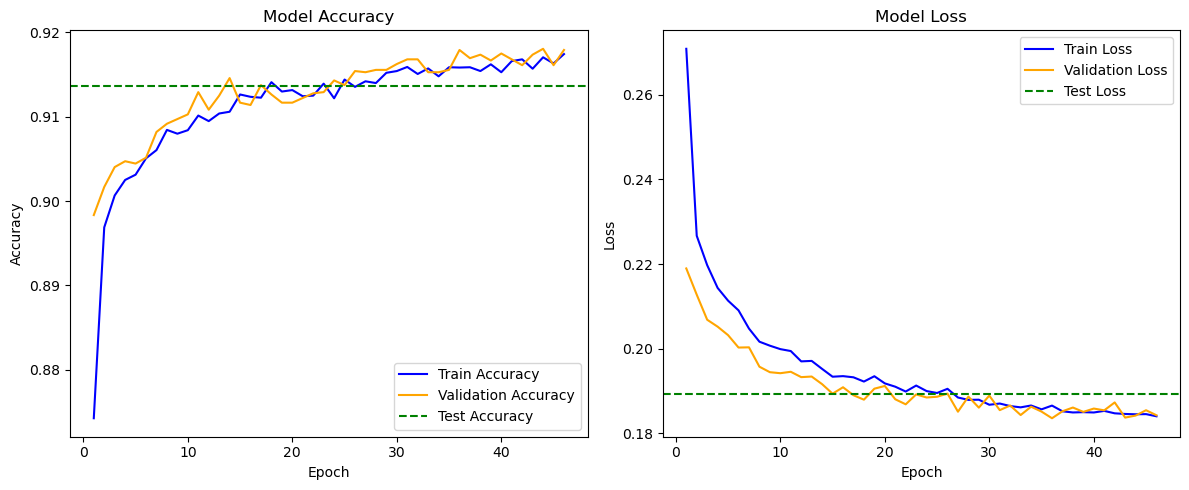

In [15]:
import matplotlib.pyplot as plt

# Evaluate on training and testing datasets
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

# Extract training history
epochs = range(1, len(history.history['accuracy']) + 1)
train_accuracy_history = history.history['accuracy']
val_accuracy_history = history.history['val_accuracy']
train_loss_history = history.history['loss']
val_loss_history = history.history['val_loss']

# Plot accuracy for training and testing
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy_history, label='Train Accuracy', color='blue')
plt.plot(epochs, val_accuracy_history, label='Validation Accuracy', color='orange')
plt.axhline(test_accuracy, linestyle='--', color='green', label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss for training and testing
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss_history, label='Train Loss', color='blue')
plt.plot(epochs, val_loss_history, label='Validation Loss', color='orange')
plt.axhline(test_loss, linestyle='--', color='green', label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()